## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [108]:
df = pd.read_csv("ab_data.csv")

In [109]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [111]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [112]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [113]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [114]:
df.groupby(["group", "landing_page"]).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [115]:
1928 + 1965

3893

f. Do any of the rows have missing values?

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [117]:
error_index = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index
df2 = df.drop(error_index)

In [118]:
df2['timestamp'] = df['timestamp'].astype('datetime64[ns]') 

In [119]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [120]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [121]:
df2[df2.duplicated(subset="user_id", keep=False)]["user_id"].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [122]:
df2[df2.duplicated(subset="user_id", keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [123]:
df2 = df2.drop_duplicates(subset="user_id")

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [124]:
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [125]:
df2[df2["group"] == "control"]["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [126]:
df2[df2["group"] == "treatment"]["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [127]:
pd.np.divide(df2[df2["landing_page"] == "new_page"].shape[0], df2.shape[0])

/home/darshanmajithiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> Summing up the section (a) through (d) - 
> * Converstion Rate regardless the page user recieved is 11.95%.
> * Converstion Rate given that the user received old page is 12.03%.
> * Converstion Rate given that the user received new page is 11.88%.

>Converstion Rates of the control and treatment group have very minute difference between them. They are also very close to the converstion rate of users regardless of what page they recieved. So we can't conclude that the new page is better than old.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} >=  0$$
$$H_1: p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2[df2["group"] == "treatment"]["user_id"].nunique()

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2["group"] == "control"]["user_id"].nunique()

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1],  n_new, p = (1 - p_new, p_new)) 

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1],  n_old, p = (1 - p_old, p_old)) 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.001264407257772146

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],  n_new, p = (1 - p_new, p_new)) 
    old_page_converted = np.random.choice([0,1],  n_old, p = (1 - p_old, p_old)) 
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  38.,  259.,  864., 2016., 2707., 2374., 1204.,  430.,   99.,
           9.]),
 array([-0.00398729, -0.00314002, -0.00229275, -0.00144547, -0.0005982 ,
         0.00024907,  0.00109634,  0.00194361,  0.00279088,  0.00363816,
         0.00448543]),
 <a list of 10 Patch objects>)

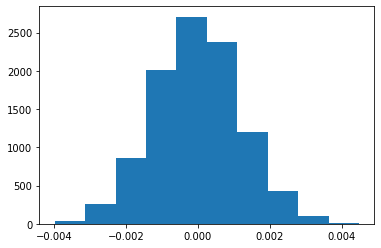

In [27]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
actual_p_old = df2.query("group == 'control'").converted.mean()
actual_p_new = df2.query("group == 'treatment'").converted.mean()
actual_p_diff = actual_p_new - actual_p_old
actual_p_diff

-0.0015782389853555567

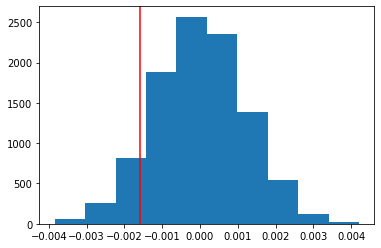

In [29]:
p_diffs = np.array(p_diffs)
#calcualte the null_vals based on the std of the p_diffs array
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(actual_p_diff, color = 'r')

In [30]:
(null_vals > actual_p_diff).mean()

0.907

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
In j, we calculated that the p-value is 0.9095.

What exactly did we do?

We assumed that the null hypothesis is true. With that, we assume that p_old = p_new, so both pages have the same converting rates over the whole sample. Therefore we also assume, that the individual converting probability of each page is equal to the one of the whole sample. Based on that, we bootstrapped a sampling distribution for both pages and calculated the differences in the converting probability per page with n equal to the original number of people who received each page and a converting probability of 0.119597. With the resulting standard deviation of the differences (which is coming from the simulated population), we then calcualted values coming from a normal distribution around 0. As last step we calculated the proportion of values which are bigger than the actually observed difference. The calculated p-value now tells us the probability of receiving this observed statistic if the null hypothesis is true. With a Type-I Error Rate of 0.05, we can say that 0.9095 > 0.05, therefore we don't have enough evidence to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
from scipy.stats import norm

#calculate z-test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

#calculate the critical z_term
z_critical=norm.ppf(1-(0.05))

print("Z-Score: ",z_score, "\nCritical Z-Score: ", z_critical, "\nP-Value: ", p_value)


Z-Score:  1.3109241984234394 
Critical Z-Score:  1.6448536269514722 
P-Value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value here agrees with our findings in j. Also the calculated Z-Score is smaller than the Critical Z - Score, so we also fail to reject the null hypothesis based on the Z-test.

In conclusion we accept the null hypothesis that the coversion rates of the old page are equal or better than the conversion rates of the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [34]:
#create a column for the intercept
df2['intercept'] = 1

#create a dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))

#ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   new_page      290584 non-null  uint8 
 7   old_page      290584 non-null  uint8 
 8   ab_page       290584 non-null  uint8 
dtypes: int64(3), object(3), uint8(3)
memory usage: 26.4+ MB


In [37]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
result = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [39]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:50:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* The p-value associated with ab_page is 0.19.

* The null hypothesis associated here - is that there is no difference between the treatment and control group.

* Alternative hypotheses is that there is difference between the treatment and control group

* Part II assumes that the old page is better unless the new page proves to be definitely better at a Type-I error rate of 5%, so when compared from both the above sceanrios,they have different explainory variable or factor for the result.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* Other factors which might influence is time(timestamp variable). We can observe if there is any difference in browsing time of each user, so that the conversion rate will vary as per the time.
* For this timestamp variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".
* The main disadavantage for adding additional terms into regression model is that it will make our model more comlplex which can complicate in interpreting the model output. There is a chance of having multicollinearity and overfitting if these new variables are not taken care off.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(4)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK


In [41]:
countries_df["country"].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
df3 = pd.merge(df2, countries_df, on="user_id")

In [43]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])

df3 = df3.drop(df3['CA'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
df3['intercept'] = 1
#Create Logit regression model for converted and country, and us CA and old page as baseline
logit_model = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])

result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:               2.325e-05
Time:                        18:50:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1757
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.248      0.000      -2.082      -1.978
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.075      -0.005       0.106
US             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

In [45]:
#exponentiated the CV to inteprete the result
np.exp(result.params)

intercept    0.131333
new_page     0.985152
UK           1.051944
US           1.041611
dtype: float64

### Regression Model using scikit learn

Skip the training with stats module and start from here if you want to train using scikit learn

In [164]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as skconfusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#df = pd.read_csv("ab_data.csv")
countries_df = pd.read_csv("countries.csv")

In [129]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [130]:
df2.drop("group", axis=1, inplace=True)

In [131]:
df2.head()

,user_id,timestamp,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,old_page,0
1,804228,2017-01-12 08:01:45.159739,old_page,0
2,661590,2017-01-11 16:55:06.154213,new_page,0
3,853541,2017-01-08 18:28:03.143765,new_page,0
4,864975,2017-01-21 01:52:26.210827,old_page,1


In [132]:
df2= df2.join(pd.get_dummies(df2['landing_page'], drop_first=True))

In [133]:
df2.drop(["landing_page"], axis=1, inplace=True)

In [134]:
countries_df = pd.read_csv('countries.csv')
data = pd.merge(df2, countries_df, on="user_id")

In [135]:
#data[['CA','UK','US']] = pd.get_dummies(data['country'], drop_first=True)
data = data.join(pd.get_dummies(data['country'], drop_first=True))


In [136]:
data.drop("country", axis=1, inplace=True)
data.head()

,user_id,timestamp,converted,old_page,UK,US
0,851104,2017-01-21 22:11:48.556739,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0,1


In [137]:
## Create temporal variables here based on the date column
data['timestamp'] =  pd.to_datetime(data['timestamp'])
data['hr'] = data['timestamp'].dt.hour
data['week_day'] = data['timestamp'].dt.weekday

data['shift'] = data['hr'].apply(lambda x : { x <12:'Morning', 12<=x<18:'Afternoon'}.get(True, 'Evening'))

In [138]:
data = data.join(pd.get_dummies(data['shift'], drop_first=True))

In [139]:
data.drop("shift", axis=1, inplace=True)

In [156]:
data.drop("timestamp", axis=1, inplace=True)

In [140]:
data.head()

,user_id,timestamp,converted,old_page,UK,US,hr,week_day,Evening,Morning
0,851104,2017-01-21 22:11:48.556739,0,1,0,1,22,5,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0,1,8,3,0,1
2,661590,2017-01-11 16:55:06.154213,0,0,0,1,16,2,0,0
3,853541,2017-01-08 18:28:03.143765,0,0,0,1,18,6,1,0
4,864975,2017-01-21 01:52:26.210827,1,1,0,1,1,5,0,1


In [141]:
data.drop("user_id", axis=1, inplace=True)

In [142]:
data.head()

,timestamp,converted,old_page,UK,US,hr,week_day,Evening,Morning
0,2017-01-21 22:11:48.556739,0,1,0,1,22,5,1,0
1,2017-01-12 08:01:45.159739,0,1,0,1,8,3,0,1
2,2017-01-11 16:55:06.154213,0,0,0,1,16,2,0,0
3,2017-01-08 18:28:03.143765,0,0,0,1,18,6,1,0
4,2017-01-21 01:52:26.210827,1,1,0,1,1,5,0,1


In [158]:
X = data.drop("converted", axis=1)
y = data[["converted"]]

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, stratify=y)

In [159]:
y_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [168]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train) # fit the train data
pred_cv = log_model.predict(X_test)
print(log_model.score(X_test,y_test))


/home/darshanmajithiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8804028631733505


In [166]:
y_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
pred

the recall for this model is : 0.0
TP 0
TN 76750
FP 0
FN 10426


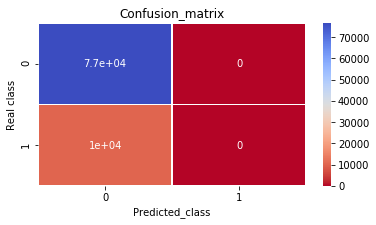

[[76750     0]
 [10426     0]]

--------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     76750
           1       0.00      0.00      0.00     10426

    accuracy                           0.88     87176
   macro avg       0.44      0.50      0.47     87176
weighted avg       0.78      0.88      0.82     87176



/home/darshanmajithiya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:

confusion_matrix = skconfusion_matrix(y_test,pred_cv)
print("the recall for this model is :",confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))

fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",confusion_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",confusion_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",confusion_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",confusion_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(confusion_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print(confusion_matrix)
print("\n--------------------Classification Report------------------------------------")
print(classification_report(y_test, pred_cv))

## Summary

* From the above Logit Regression Results, we can see that the only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate but other variables are not statistically significant.
* The country a user lives is not statistically significant on the converted rate considering the page the user land in.
* For every unit for new_page decreases, the user getting converted will be 7.0% more likely to happen while holding all other varibles constant.
* The user getting Converted is 1.08 times more likely to happen for UK and new page users than CA and new page users while holding all other varible constant.
* The user getting Converted is 1.04 times more likely to happen for US and new page users than CA and new page users while holding all other varible constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0